# Set up

Python librairies imports :

In [3]:
!pip install missingno

In [4]:
# File system management
import os

# Data manipulation
import numpy as np
import pandas as pd

# Data analysis
import missingno as msno

# Features engineering
from sklearn.preprocessing import LabelEncoder

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(palette="Set1")

Define work location :

In [5]:
project_path = "/Users/laureagrech/Downloads/OC_DS_P7"

# Change directory
os.chdir(project_path)

Load data :

In [9]:
# List csv files
csv_names = os.listdir("/Users/laureagrech/Desktop/oc/Projets OC/P7/data")
print(csv_names)

['application_test.csv', 'dashboard joblib test.ipynb', 'data_drift_report.html', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', '4-data-drift.ipynb', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', '.ipynb_checkpoints', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [13]:
# Load data
data_columns_desc = pd.read_csv("/Users/laureagrech/Desktop/oc/Projets OC/P7/data/HomeCredit_columns_description.csv",
                                encoding='latin1', index_col=[0])

data_app_train = pd.read_csv("/Users/laureagrech/Desktop/oc/Projets OC/P7/data/application_train.csv")
# data_app_test = pd.read_csv("data/external/home-credit-default-risk/application_test.csv")
# data_app_prev = pd.read_csv("data/external/home-credit-default-risk/previous_application.csv")

# data_bureau = pd.read_csv("data/external/home-credit-default-risk/bureau.csv")
# data_bureau_balance = pd.read_csv("data/external/home-credit-default-risk/bureau_balance.csv")
# data_pos_balance = pd.read_csv("data/external/home-credit-default-risk/POS_CASH_balance.csv")
# data_card_balance = pd.read_csv("data/external/home-credit-default-risk/credit_card_balance.csv")
# data_instl_payments = pd.read_csv("data/external/home-credit-default-risk/installments_payments.csv")
# data_submission = pd.read_csv("data/external/home-credit-default-risk/sample_submission.csv")

# Functions

## General functions

In [14]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, name="The selected dataframe"):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print (name + " has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Plot functions

In [15]:
# Display barplot
def display_barplot(data=None, x=None, y=None, title='Barplot', figsize=(8, 6),
                    order=None, palette=None, xrotation=0, ylabel=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.barplot(data=data, x=x, y=y, order=order, palette=palette)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.xticks(rotation=xrotation)
    plt.show()


# Display histplot
def display_histplot(data, x=None, y=None, title='Histplot', figsize=(8, 6), kde=False, hue=None,
                     bins='auto'):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.histplot(data=data, x=x, y=y, kde=kde, hue=hue, bins=bins)
    plt.show()


# Display kdeplot
def display_kdeplot(data, x=None, y=None, title='KDEplot', figsize=(8, 6), hue=None, common_norm=True):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.kdeplot(data=data, x=x, y=y, hue=hue, common_norm=common_norm)
    plt.show()


# Display countplot
def display_countplot(data, x=None, y=None, title='Countplot', figsize=(8, 6),
                      order=None, xrotation=0):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.countplot(data=data, x=x, y=y, order=order)
    plt.xticks(rotation=xrotation)
    plt.show()


# Display scatterplot
def display_scatterplot(data, x=None, y=None, title='Scatterplot', figsize=(8, 8), hue=None, palette=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=palette)
    if (hue is not None):
        plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
    plt.show()


# Display scatterplot
def display_scatterplot_annotate(data, x=None, y=None, title='Scatterplot', figsize=(8, 8), annotation='name'):
    plt.figure(figsize=figsize)
    plt.title(title)
    for i in range(data.shape[0]):
        pt_x = data[x].iloc[i]
        pt_y = data[y].iloc[i]
        pt_name = data[annotation].iloc[i]
        sns.scatterplot(x=[pt_x], y=[pt_y])
        plt.annotate(pt_name, xy=(pt_x, pt_y), xytext=(5, 2), textcoords='offset points',
                     ha='right', va='bottom')
    plt.tight_layout()
    plt.show()

In [16]:
# Display multi plot
def create_multi_plot(n_elements, title="Plot", figsize=None):

    # Compute size of plot
    if (n_elements < 4):
        n_rows = 1
        n_cols = n_elements
    elif (n_elements == 4):
        n_rows = 2
        n_cols = 2
    else:
        n_rows = (n_elements // 3 + 1) if (n_elements % 3 > 0) else (n_elements // 3)
        n_cols = 3

    # Init fig
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the list of axes
    axes = ax.flatten() if isinstance(ax, np.ndarray) else np.array(ax)

    # Title
    plt.suptitle(title)

    return fig, axes

In [17]:
# Display multi countplot
def display_multi_countplot(data, columns, title='Countplot', figsize=(20, 20),
                            order=None, xrotation=None):

    elem_n = len(columns)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title=title, figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):

        # Draw counplot
        sns.countplot(data=data, x=columns[elem], order=order, ax=ax)
        ax.title.set_text(columns[elem])

        if data[columns[elem]].dtypes == object:
            ax.tick_params(axis='x', labelrotation=xrotation)

    plt.tight_layout()
    plt.show()

In [18]:
# Display multi hue scatterplot
def display_multihue_scatterplot(data, x, y, hue_list, title, figsize=(20, 20)):

    elem_n = len(hue_list)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title=title, figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):
        hue = hue_list[elem]
        # Draw scatterplot
        sns.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax,
                        palette=sns.color_palette("husl", data[hue].nunique()))
        ax.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
        ax.title.set_text(hue)

    plt.tight_layout()
    plt.show()

## Apply functions

In [19]:
# Apply function product category from dictionary
# def apply_new_category(row, **dictionary):
#     category_1 = row['product_category_1']
#     category_2 = row['product_category_2']
#     new_category = category_1 + " Others"

#     if (type(category_2) != int) and (type(category_2) != float):
#         for dict_category, dict_category_list in dictionary.items():
#             if category_2 in dict_category_list:
#                 new_category = dict_category
#                 break

#     return new_category

## Dimension reduction functions

In [20]:
# Apply TSNE and create dataframe
def TSNE_create(data, n_components=2, perplexity=50, init='pca', learning_rate='auto'):

    # Create TSNE model
    tsne = TSNE(n_components=n_components, perplexity=perplexity, init=init, learning_rate=learning_rate,
                random_state=0)

    # Apply on data
    tsne_data = tsne.fit_transform(data)

    # Create dataframe
    columns = ["tSNE"+str(i) for i in range(1, n_components+1)]
    tsne_df = pd.DataFrame(data=tsne_data, columns=columns)

    return tsne_df

In [21]:
# Try TSNE perplexity values
def TSNE_try_perplexity(data, perplexities=[5, 10, 20, 30, 40, 50], figsize=(30, 20)):

    # Define number of columns
    elem_n = len(perplexities)

    # Create subplots
    fig, axes = create_multi_plot(elem_n, title="t-SNE: test perplexity values", figsize=figsize)

    for ax, elem in zip(axes, range(elem_n)):

        # Create TSNE df
        tsne_df = TSNE_create(data, perplexity=perplexities[elem])

        # Draw scatterplot
        sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', ax=ax)

    plt.tight_layout()
    plt.show()

# Exploratory data analysis

## General information

I display the general information on the dataset.

In [22]:
# Display info
display(data_app_train.info())

# Display first rows
print("\nFirst rows: ")
display(data_app_train.head(5))

# Display description
print("\nNumerical columns description: ")
display(data_app_train.describe(include=[np.number]))
print("\nCategorical columns description: ")
display(data_app_train.describe(exclude=[np.number]))

print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None


First rows: 


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



Numerical columns description: 


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000



Categorical columns description: 


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


I use the **HomeCredit_columns_description** dataset to display the columns descriptions of the **application_train** dataset.

In [23]:
data_columns_desc.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [24]:
# Option to display all rows
pd.set_option('display.max_rows', None)

# Display description of application table
display(data_columns_desc[data_columns_desc['Table'] == "application_{train|test}.csv"])

# Reset option
pd.reset_option('display.max_rows')

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


## Missing values

Let's check the dataset missing values.

In [25]:
# Create missing values dataframe
missing_values = missing_values_table(data_app_train, "application_train")
display(missing_values.head(20))

application_train has 122 columns.
There are 67 columns with missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


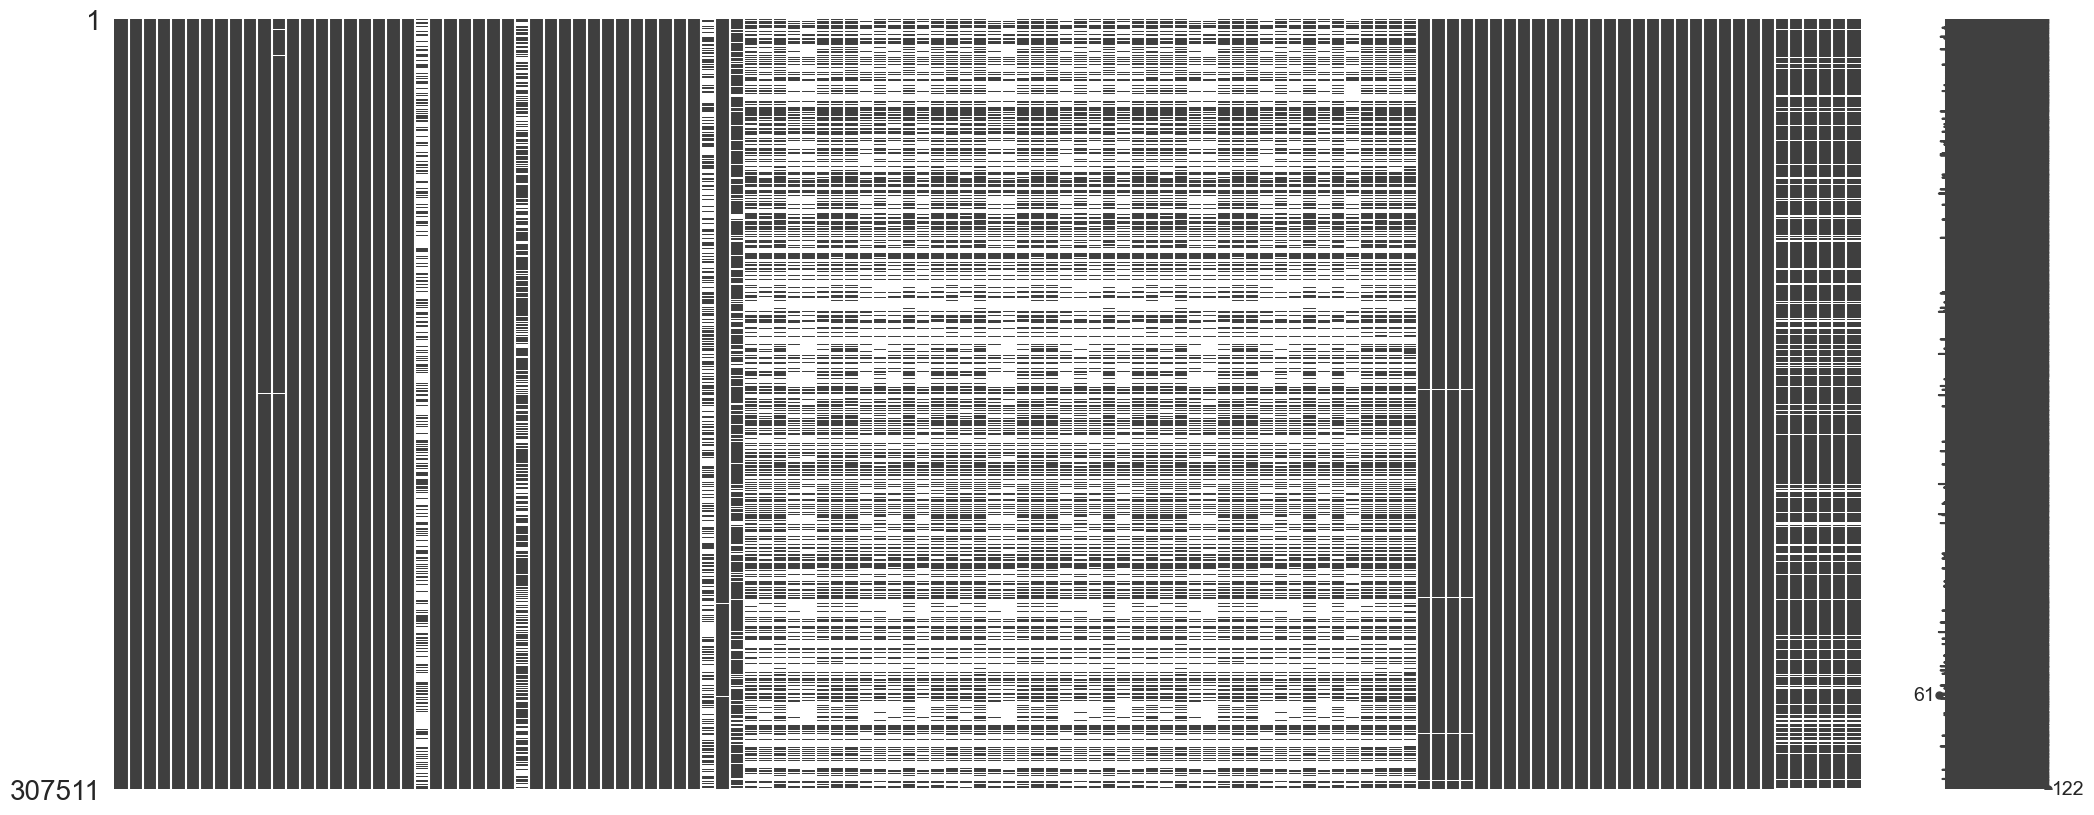

In [26]:
# Display missing values matrix
msno.matrix(data_app_train)
plt.show()

In [27]:
# Print number of missing values
nan_values = data_app_train.isna().sum().sum()
print("Missing values = {} ({:.2%})".format(nan_values, nan_values/data_app_train.size))

Missing values = 9152465 (24.40%)


## Duplicates

Let's check if there are duplicates in the dataset.

In [28]:
# Check for duplicates
duplicates = data_app_train.duplicated()
print(str(data_app_train[duplicates].size) + " duplicates found in the dataset application_train.")

0 duplicates found in the dataset application_train.


In [29]:
# Check for duplicates on ID
duplicates = data_app_train.duplicated(subset='SK_ID_CURR')
print(str(data_app_train[duplicates].size) + " duplicates found in the column SK_ID_CURR.")

0 duplicates found in the column SK_ID_CURR.


# Data exploration

In [30]:
# Define usefull variables
TARGET = 'TARGET' 
ID = 'SK_ID_CURR'

In [31]:
# Copy dataframe before exploration
train_df = data_app_train.copy()

### TARGET distribution

*TARGET* : 
* 0 : if the loan was repaid on time
* 1 : if the client had payment difficulties.

TARGET
0    282686
1     24825
Name: count, dtype: int64

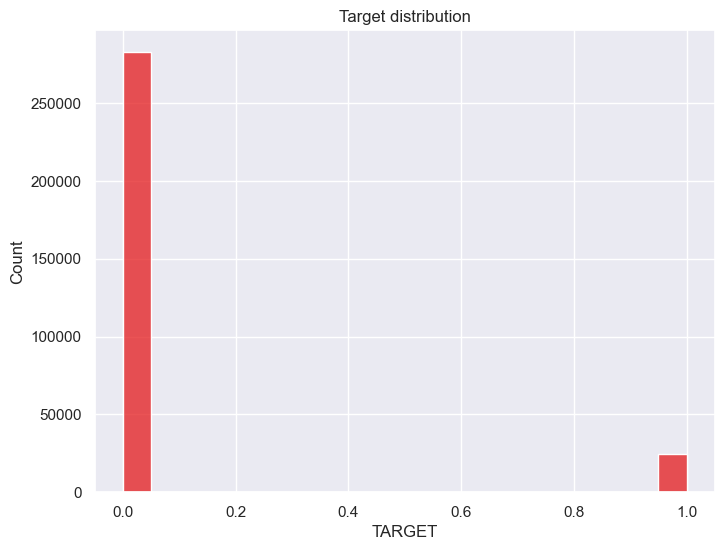

In [32]:
# Display the target value counts
display(train_df[TARGET].value_counts())

# Display the target distribution
display_histplot(train_df, x=TARGET, title="Target distribution")

### TARGET correlation

Let's check the variables correlations.

In [35]:
# Filtrer les colonnes numériques uniquement
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculer les corrélations sur les colonnes numériques
correlations = numeric_df.corr()

# Afficher les premières corrélations
print(correlations)


                            SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -

I display the target most correlated variables.

In [36]:
# Sort correlations by target
corr_sorted = correlations.sort_values(by=TARGET)[TARGET]

# Display correlations
print('Most positive correlations:\n', corr_sorted.tail(10))
print('\nMost negative correlations:\n', corr_sorted.head(10))

Most positive correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most negative correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


The *external source* variables are the most correlated to the target. Let's check their distribution.

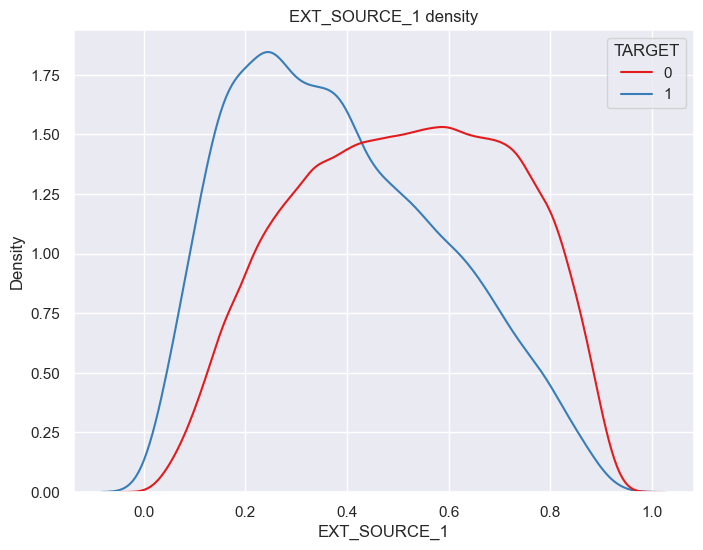

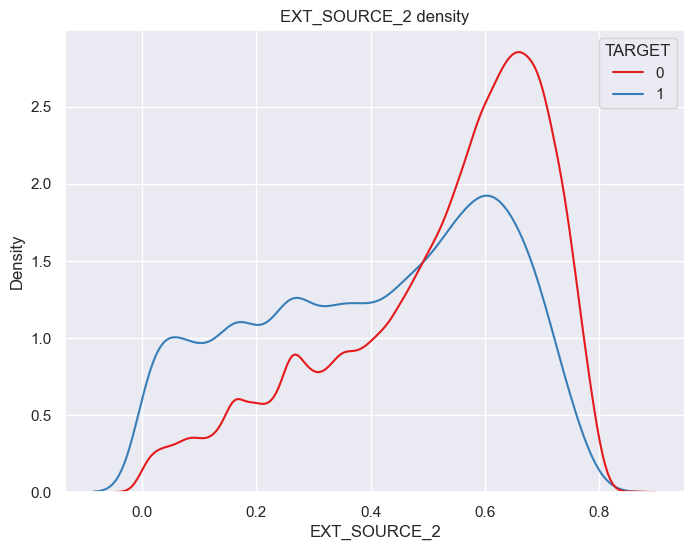

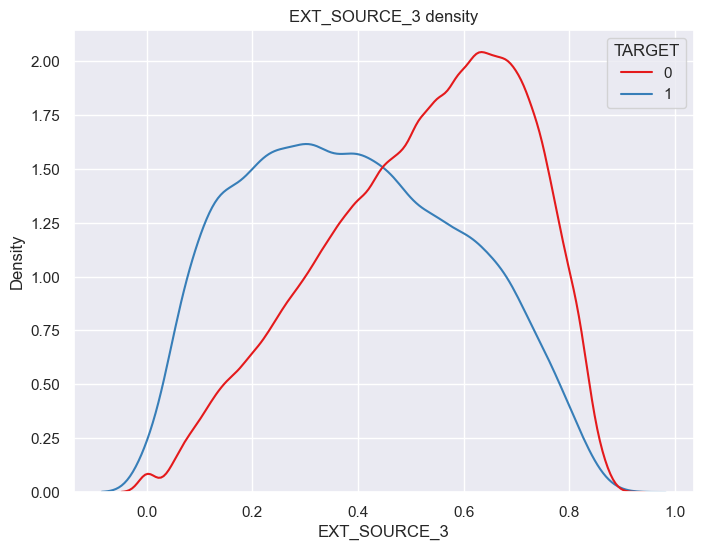

In [37]:
for ext_col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    display_kdeplot(train_df, x=ext_col, hue=TARGET, common_norm=False,
                     title=ext_col+" density")

### TARGET per category

In [38]:
# Display the repay failure (target=1) percentage for selected categorical column
def display_repay_failure_category(data, column, limit=None):

    grouped_data = data[[column, TARGET]].groupby(column).mean().reset_index()
    grouped_data = grouped_data.sort_values(by=TARGET, ascending=False)

    categories = grouped_data[column].unique()
    n_categories = grouped_data[column].nunique()
    avg_len = sum(map(len, categories)) / n_categories

    # Rotate longer category strings
    xrotation=70 if avg_len > 4 else 0
    
    # Figsize according to number of categories
    figsize=(6, 6) if n_categories < 4 else (12, 6)

    display_barplot(grouped_data, x=column, y=TARGET, xrotation=xrotation, figsize=figsize,
                    title="Repay failure (target==1) by " + column, ylabel="Repay failure %")

I display the repay failure percentage for each categorical variable.

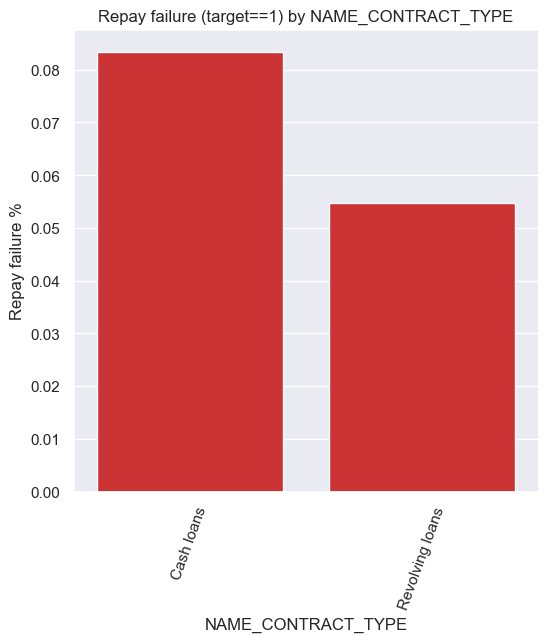

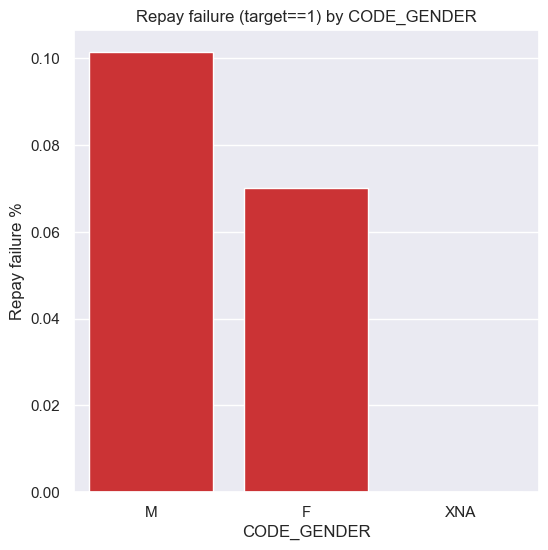

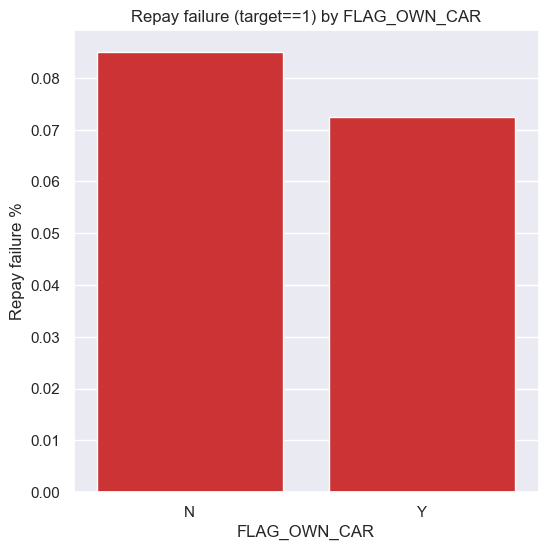

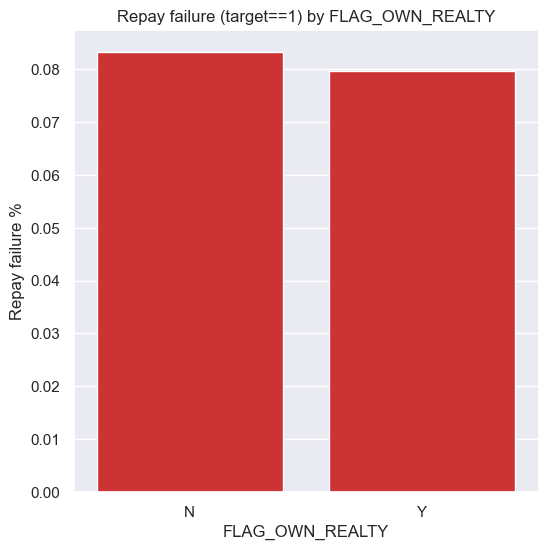

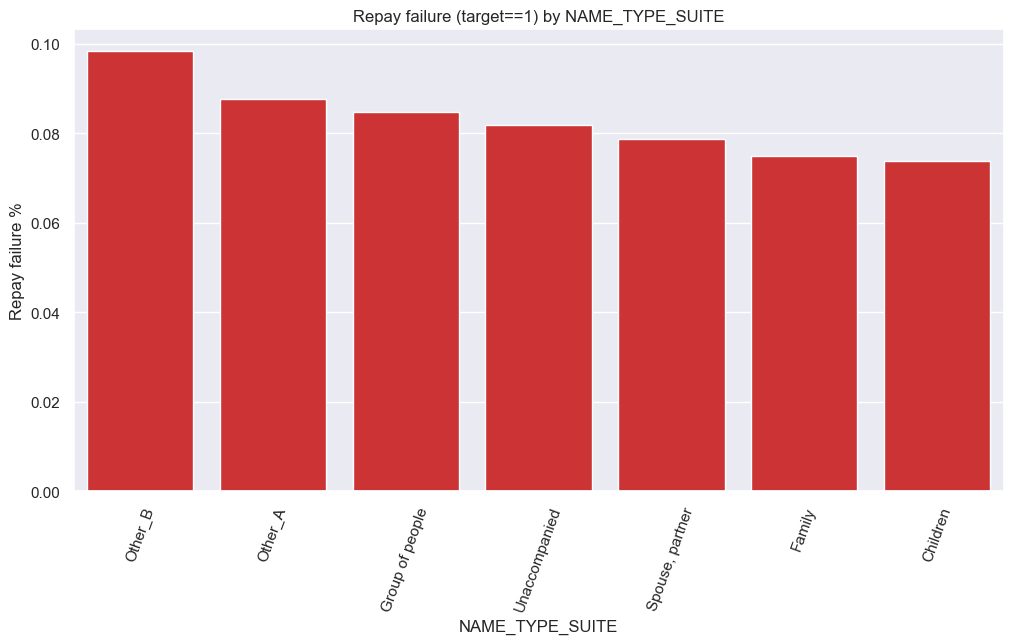

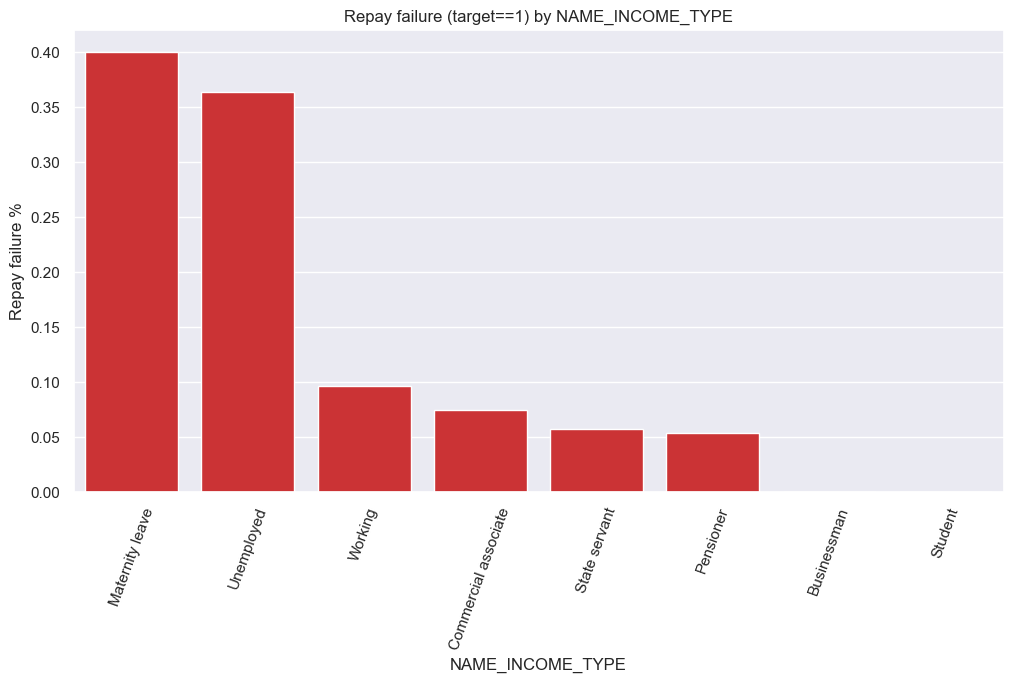

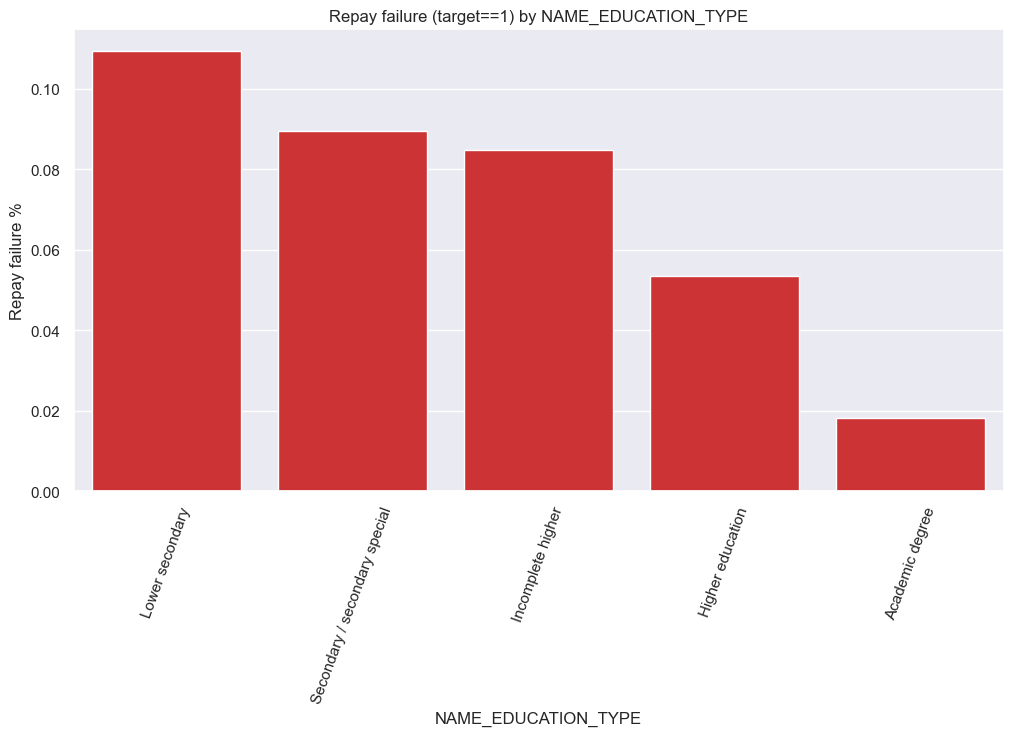

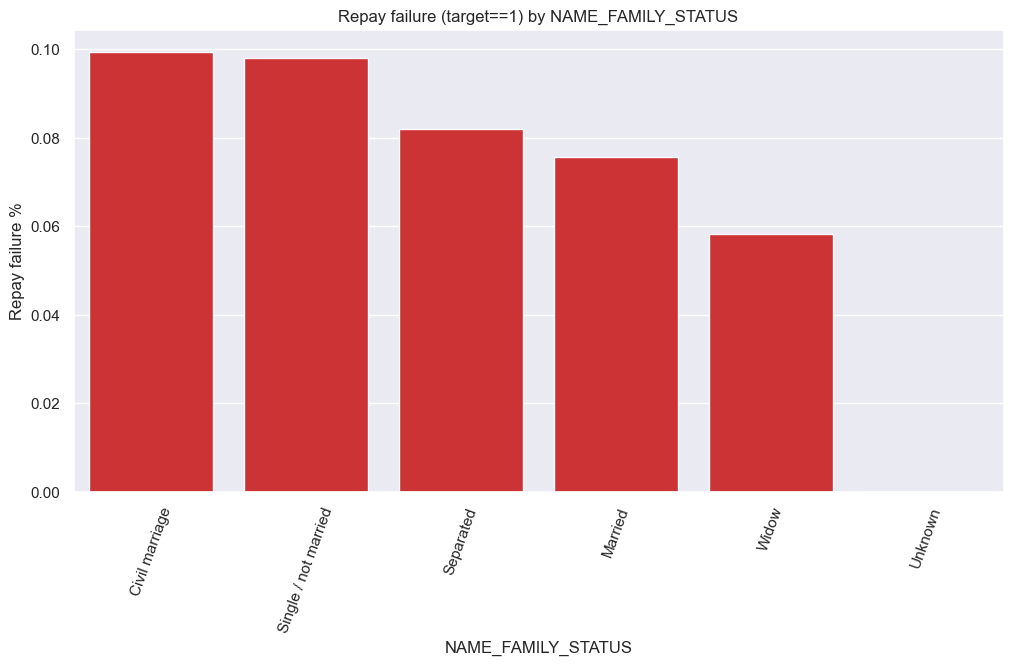

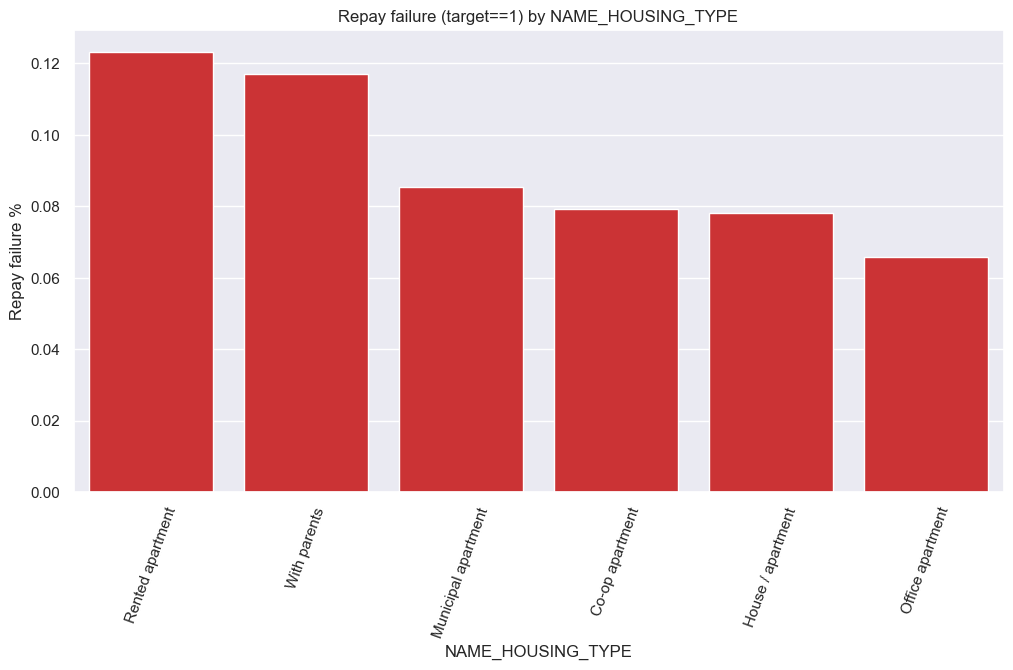

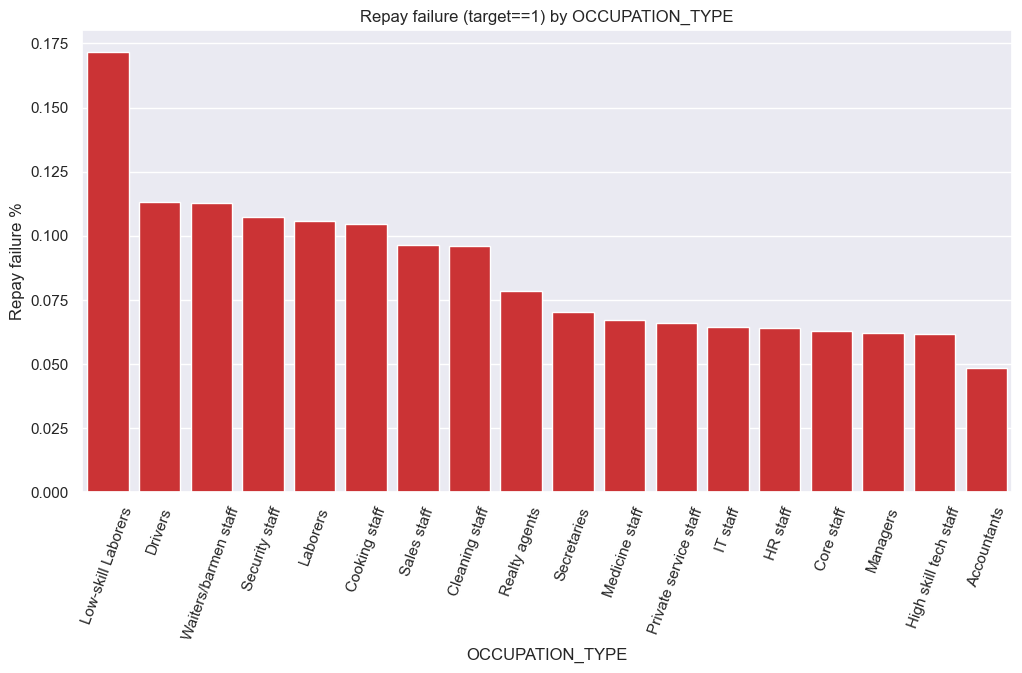

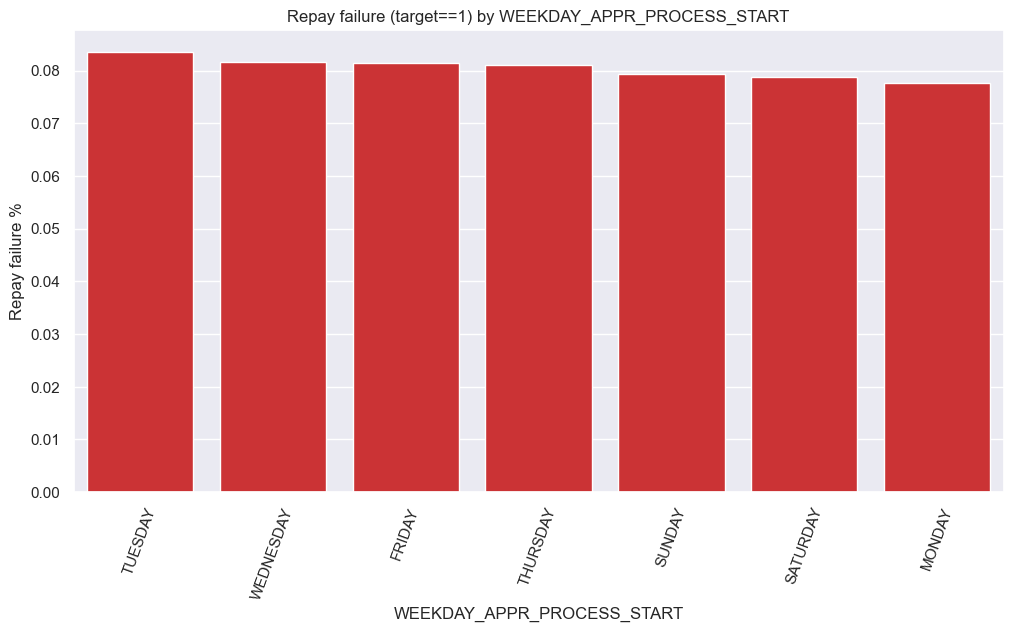

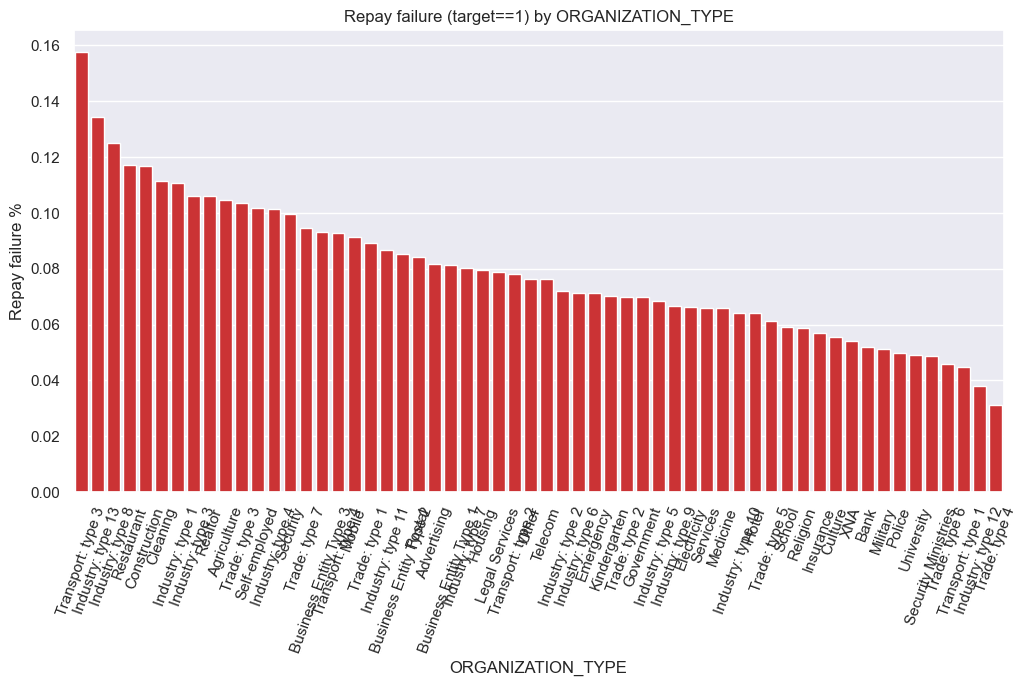

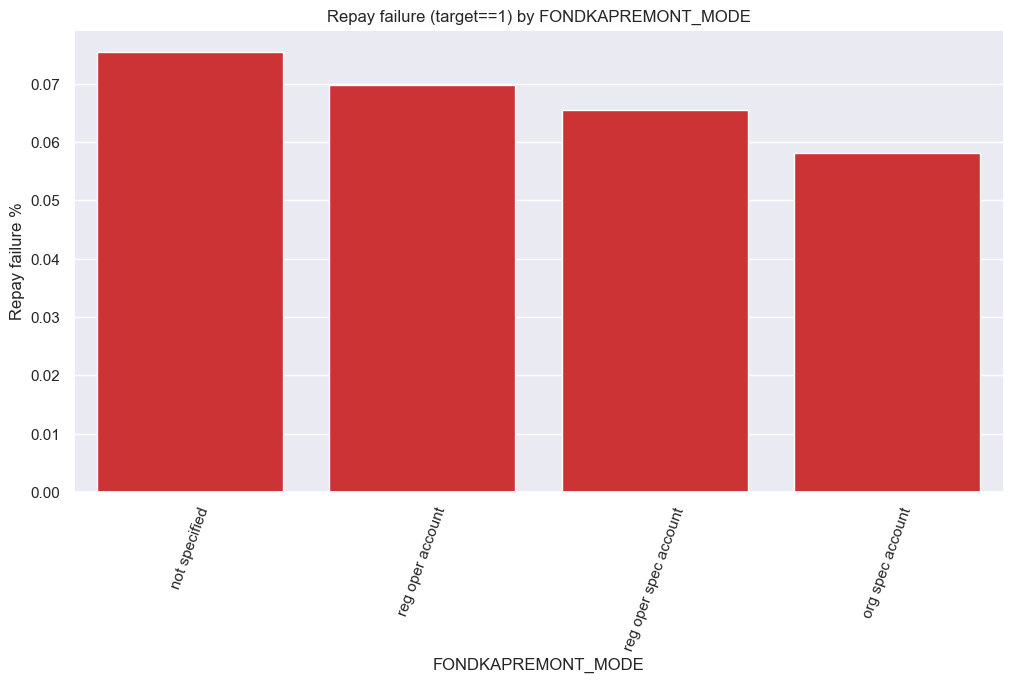

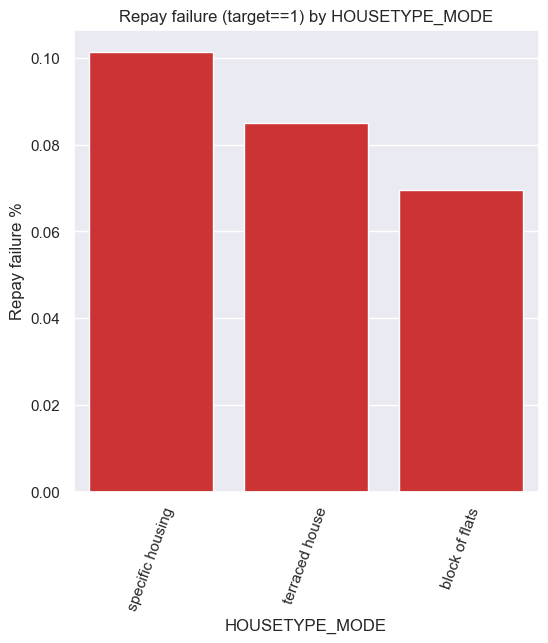

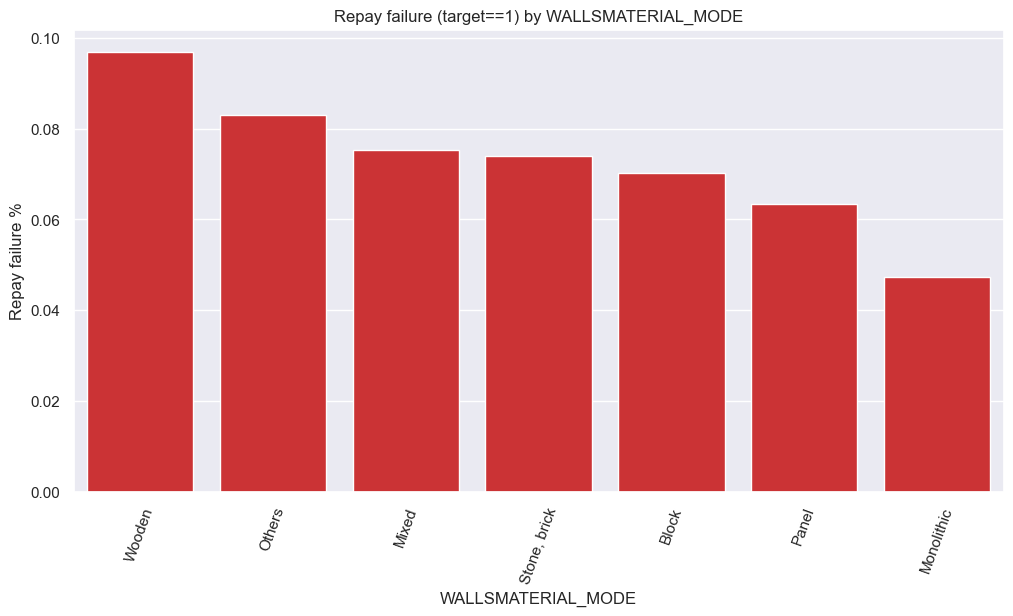

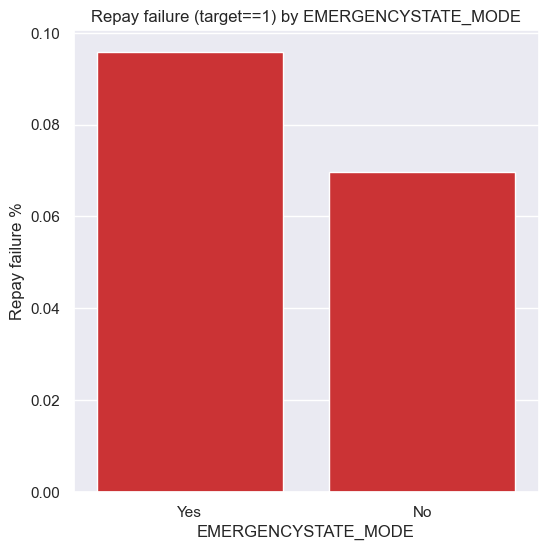

In [39]:
for col in train_df.select_dtypes(object).columns:
    display_repay_failure_category(train_df, col)

### DAYS variables

All *DAYS_* feature are negative because they are recorded relative to the current loan application.

In [40]:
# Display AGE variables
display((train_df['DAYS_BIRTH'] /-365).describe())
display((train_df['DAYS_EMPLOYED'] /-365).describe())
display((train_df['DAYS_REGISTRATION'] /-365).describe())

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

It looks like the *DAYS_EMPLOYED* variable has anomalies. The minimal value is about -1000 years.

Let's check the *DAYS_EMPLOYED* distribution.

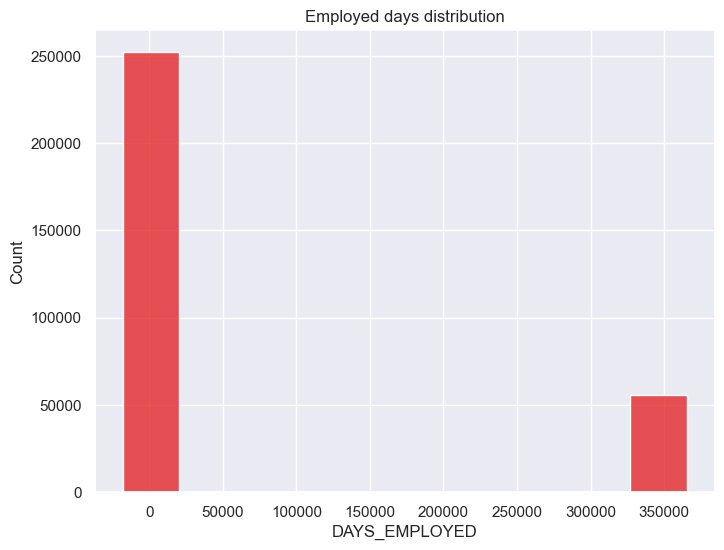

In [41]:
# Display days employed distribution
display_histplot(train_df, x='DAYS_EMPLOYED', bins=10, title="Employed days distribution")

I decide to replace the anomalies with NaN.

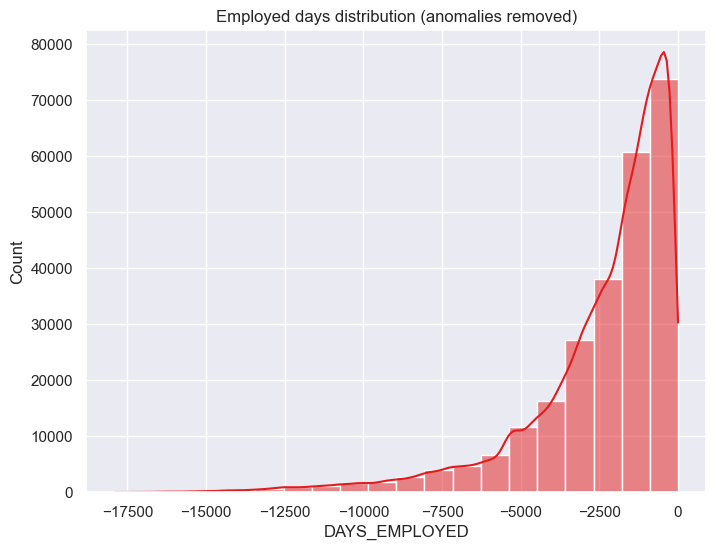

In [42]:
# Get anomalies days employed value
anom_value = train_df['DAYS_EMPLOYED'].max()

# Replace anomalies value by NaN
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].replace({anom_value: np.nan})

# Display the new distribution
display_histplot(train_df, x='DAYS_EMPLOYED', kde=True, bins=20,
                 title="Employed days distribution (anomalies removed)")

I make sure employement days are correct.

In [43]:
# Check if error in days
print('Number of employed before birth : ' + \
      str(train_df[train_df['DAYS_EMPLOYED'] < train_df['DAYS_BIRTH']].shape[0]))
print('Number of registration before birth : ' + \
      str(train_df[train_df['DAYS_REGISTRATION'] < train_df['DAYS_BIRTH']].shape[0]))

Number of employed before birth : 0
Number of registration before birth : 1


In [44]:
# Remove entry with incorect days
remove_idx = train_df[train_df['DAYS_REGISTRATION'] < train_df['DAYS_BIRTH']].index
train_df = train_df.drop(remove_idx)

I create an new estimated age (*EST_AGE*) variable.

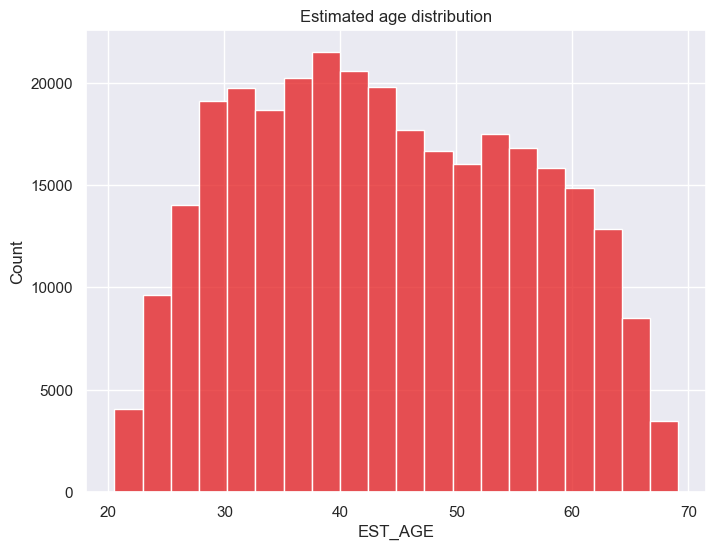

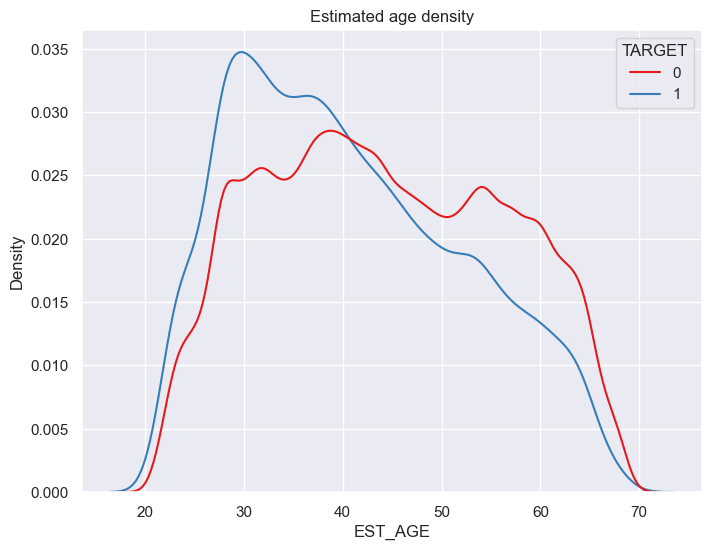

In [45]:
# Create estimated age variable
train_df['EST_AGE'] = (train_df['DAYS_BIRTH']/-365)

# Display age distribution
display_histplot(train_df, x='EST_AGE', bins=20, title="Estimated age distribution")

# Display age distribution by target
display_kdeplot(train_df, x='EST_AGE', hue=TARGET, title="Estimated age density",
                common_norm=False)

In [46]:
# Age information into a separate dataframe
age_df = train_df[['TARGET', 'EST_AGE']].copy()

# Bin the age data
age_df['AGE_GROUP'] = pd.cut(age_df['EST_AGE'], bins = np.linspace(20, 70, num = 11))
display(age_df.head())

# Group by age group
age_grouped_df = age_df.groupby('AGE_GROUP').mean()
display(age_grouped_df)

,TARGET,EST_AGE,AGE_GROUP
0,1,25.920548,"(25.0, 30.0]"
1,0,45.931507,"(45.0, 50.0]"
2,0,52.180822,"(50.0, 55.0]"
3,0,52.068493,"(50.0, 55.0]"
4,0,54.608219,"(50.0, 55.0]"


/var/folders/t0/bk4v248j27n4pms6k42stgrm0000gn/T/ipykernel_3321/763222033.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped_df = age_df.groupby('AGE_GROUP').mean()


,TARGET,EST_AGE
AGE_GROUP,,
"(20.0, 25.0]",0.123036,23.377522
"(25.0, 30.0]",0.111439,27.822522
"(30.0, 35.0]",0.102814,32.479037
"(35.0, 40.0]",0.089414,37.555913
"(40.0, 45.0]",0.078491,42.459346
"(45.0, 50.0]",0.074171,47.462741
"(50.0, 55.0]",0.066968,52.593136
"(55.0, 60.0]",0.055314,57.491131
"(60.0, 65.0]",0.052737,62.412459


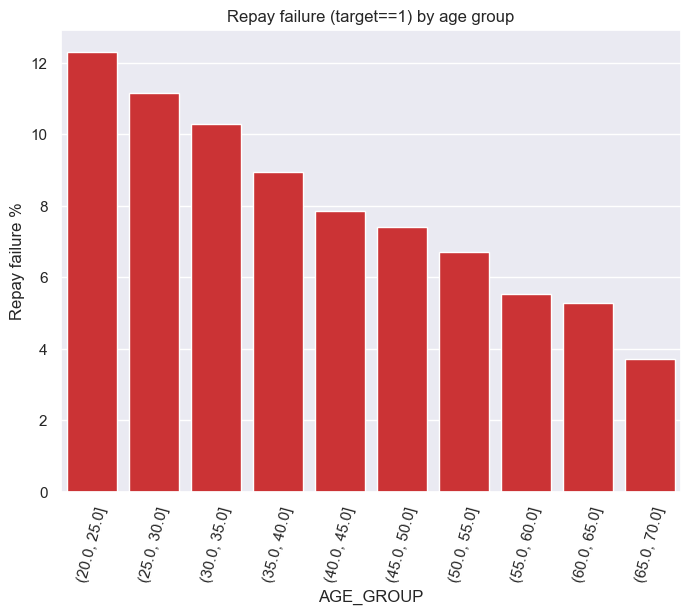

In [47]:
# Display failure to repay by age group
display_barplot(x=age_grouped_df.index.astype(str), y=100*age_grouped_df[TARGET],
                title="Repay failure (target==1) by age group", xrotation=75, ylabel="Repay failure %")

I remove the *EST_AGE* variable after the exploration.

In [48]:
# Remove the estimated age variable
train_df = train_df.drop(columns='EST_AGE')